# Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data=[]
labels=[]
classes=43
cur_path=os.getcwd()
print(cur_path)

C:\Users\Hp\Desktop\Traffic-Sign-Classification-Project


In [3]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

# Splitting the dataset into training and test sets 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## One Hot encoding the labels

In [6]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building the CNN model

In [8]:
cnn=Sequential()
cnn.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]))
cnn.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(rate=0.25))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))
cnn.add(Dropout(rate=0.25))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(rate=0.5))
cnn.add(Dense(43, activation='softmax'))

## Compiling the model

In [9]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training and Validating the model

In [11]:
history = cnn.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 117s 117ms/step - loss: 3.3664 - accuracy: 0.2704 - val_loss: 0.6127 - val_accuracy: 0.8546
Epoch 2/15
981/981 [==============================] - 105s 107ms/step - loss: 0.9209 - accuracy: 0.7256 - val_loss: 0.2984 - val_accuracy: 0.9198
Epoch 3/15
981/981 [==============================] - 105s 107ms/step - loss: 0.5305 - accuracy: 0.8397 - val_loss: 0.2152 - val_accuracy: 0.9403
Epoch 4/15
981/981 [==============================] - 105s 107ms/step - loss: 0.4289 - accuracy: 0.8731 - val_loss: 0.1360 - val_accuracy: 0.9653
Epoch 5/15
981/981 [==============================] - 104s 106ms/step - loss: 0.3786 - accuracy: 0.8882 - val_loss: 0.1266 - val_accuracy: 0.9637
Epoch 6/15
981/981 [==============================] - 104s 106ms/step - loss: 0.3379 - accuracy: 0.9000 - val_loss: 0.0834 - val_accuracy: 0.9788
Epoch 7/15
981/981 [==============================] - 105s 107ms/step - loss: 0.2834 - accuracy: 0.9148 - val_loss: 0.0975 -

In [13]:
cnn.save("model.h5")

# Plotting graphs for accuracy

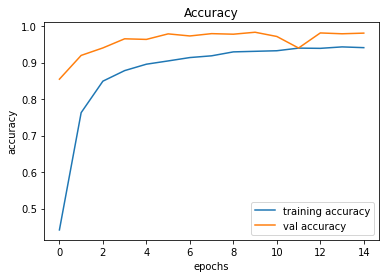

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

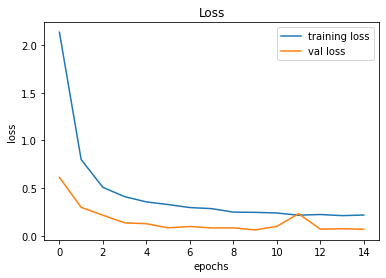

In [15]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing accuracy on Test Dataset

In [19]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = cnn.predict(X_test)